In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('taco_orders.csv')

print(df.head())

   Order_ID   Restaurant_Name     Location        Order_Time  \
0    770487      El Taco Loco     New York    1/8/2024 14:55   
1    671858      El Taco Loco  San Antonio  23-11-2024 17:11   
2    688508        Taco Haven       Austin  21-11-2024 20:24   
3    944962  Spicy Taco House       Dallas  21-09-2024 06:43   
4    476417     Casa del Taco  San Antonio  24-07-2024 11:01   

      Delivery_Time  Delivery_Duration (min) Taco_Size     Taco_Type  \
0    1/8/2024 15:36                       41   Regular  Chicken Taco   
1  23-11-2024 17:25                       14   Regular     Beef Taco   
2  21-11-2024 21:02                       38     Large     Pork Taco   
3  21-09-2024 07:28                       45   Regular  Chicken Taco   
4  24-07-2024 11:16                       15     Large     Pork Taco   

   Toppings_Count  Distance (km)  Price  Tip ($)  Weekend Order  
0               5           3.01   9.25     2.22          False  
1               1           6.20   4.25     3.01  

In [6]:
df.info

<bound method DataFrame.info of      Order_ID   Restaurant_Name     Location        Order_Time  \
0      770487      El Taco Loco     New York    1/8/2024 14:55   
1      671858      El Taco Loco  San Antonio  23-11-2024 17:11   
2      688508        Taco Haven       Austin  21-11-2024 20:24   
3      944962  Spicy Taco House       Dallas  21-09-2024 06:43   
4      476417     Casa del Taco  San Antonio  24-07-2024 11:01   
..        ...               ...          ...               ...   
995    164891      La Vida Taco       Austin  27-05-2024 11:12   
996    232442    The Taco Stand  San Antonio    3/4/2025 20:51   
997    251729       Urban Tacos      Houston  23-01-2025 05:33   
998    940215       Taco Fiesta  San Antonio    5/9/2024 15:49   
999    326183      Grande Tacos      Phoenix  19-10-2024 14:21   

        Delivery_Time  Delivery_Duration (min) Taco_Size     Taco_Type  \
0      1/8/2024 15:36                       41   Regular  Chicken Taco   
1    23-11-2024 17:25      

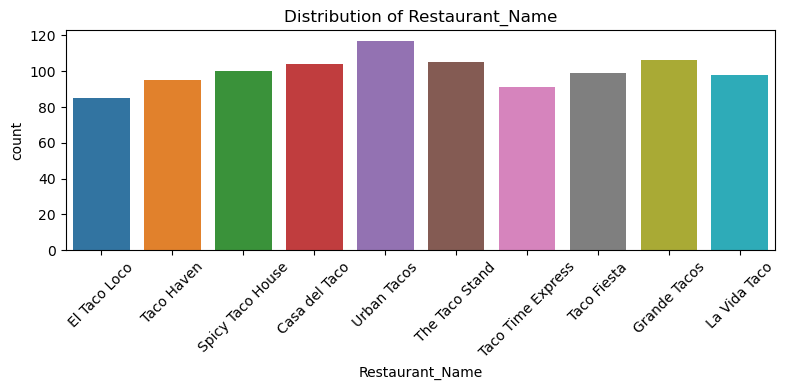

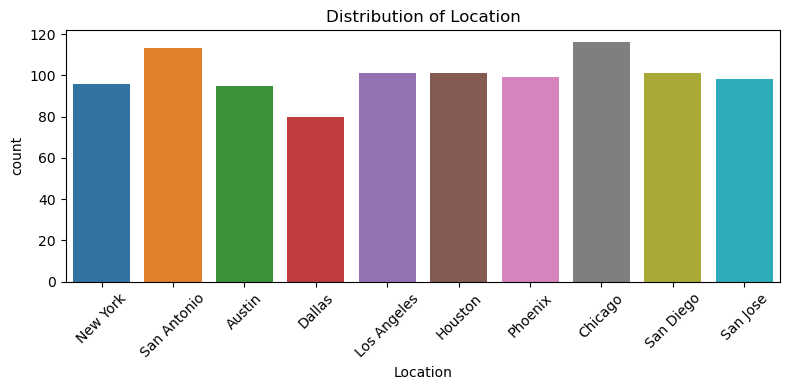

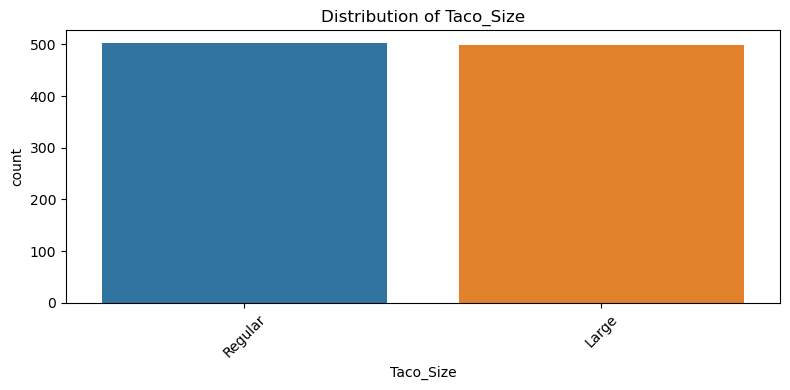

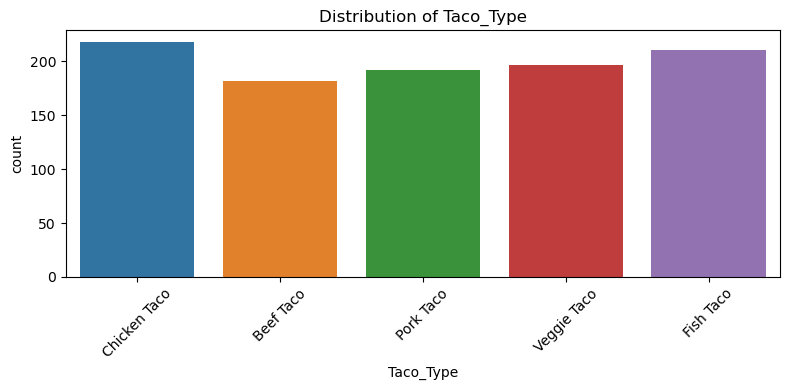

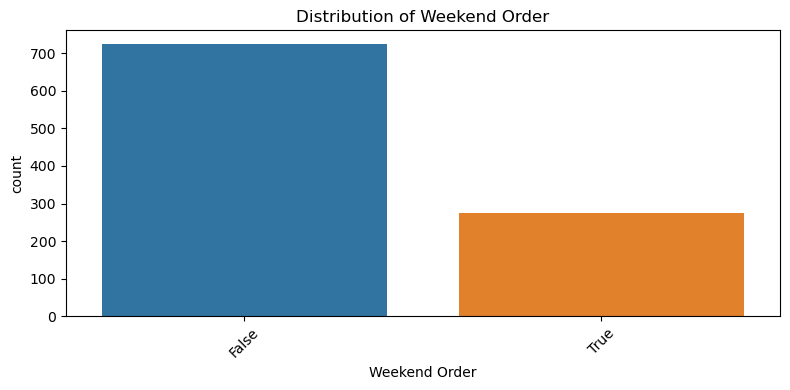

In [13]:
categoricals = ['Restaurant_Name', 'Location', 'Taco_Size', 'Taco_Type', 'Weekend Order']
for col in categoricals:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("taco_orders.csv")

# Change date & time columns
df['Order_Time'] = pd.to_datetime(df['Order_Time'], errors='coerce')
df['Delivery_Time'] = pd.to_datetime(df['Delivery_Time'], errors='coerce')

# Add order hour and day of week
df['Order_Hour'] = df['Order_Time'].dt.hour
df['Order_DayOfWeek'] = df['Order_Time'].dt.day_name()

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Order_ID                 1000 non-null   int64         
 1   Restaurant_Name          1000 non-null   object        
 2   Location                 1000 non-null   object        
 3   Order_Time               394 non-null    datetime64[ns]
 4   Delivery_Time            393 non-null    datetime64[ns]
 5   Delivery_Duration (min)  1000 non-null   int64         
 6   Taco_Size                1000 non-null   object        
 7   Taco_Type                1000 non-null   object        
 8   Toppings_Count           1000 non-null   int64         
 9   Distance (km)            1000 non-null   float64       
 10  Price                    1000 non-null   float64       
 11  Tip ($)                  1000 non-null   float64       
 12  Weekend Order            1000 non-n

,Order_ID,Restaurant_Name,Location,Order_Time,Delivery_Time,Delivery_Duration (min),Taco_Size,Taco_Type,Toppings_Count,Distance (km),Price,Tip ($),Weekend Order,Order_Hour,Order_DayOfWeek
0,770487,El Taco Loco,New York,2024-01-08 14:55:00,2024-01-08 15:36:00,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False,14.0,Monday
1,671858,El Taco Loco,San Antonio,NaT,NaT,14,Regular,Beef Taco,1,6.20,4.25,3.01,True,NaN,NaN
2,688508,Taco Haven,Austin,NaT,NaT,38,Large,Pork Taco,2,20.33,7.00,0.02,False,NaN,NaN
3,944962,Spicy Taco House,Dallas,NaT,NaT,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True,NaN,NaN
4,476417,Casa del Taco,San Antonio,NaT,NaT,15,Large,Pork Taco,0,24.34,4.50,1.14,False,NaN,NaN


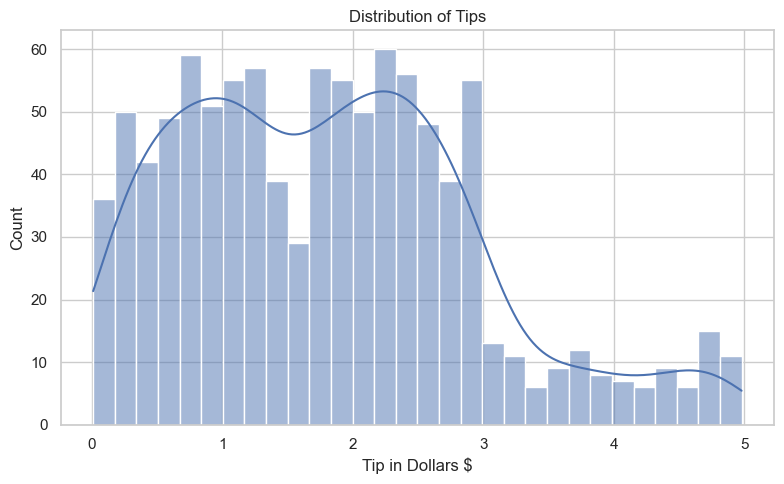

In [55]:
# Tip Distribution

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(df["Tip ($)"], bins=30, kde=True)
plt.title("Distribution of Tips")
plt.xlabel("Tip in Dollars $")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

C:\Users\kimbe\AppData\Local\Temp\ipykernel_14784\801020380.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Taco_Type", y="Tip ($)", ci=None)


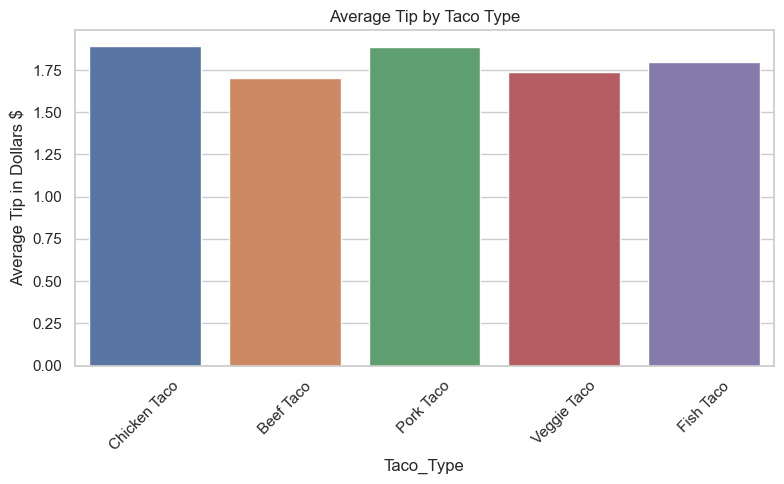

In [57]:
# Average Tip by Taco Type

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Taco_Type", y="Tip ($)", ci=None)
plt.title("Average Tip by Taco Type")
plt.ylabel("Average Tip in Dollars $")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

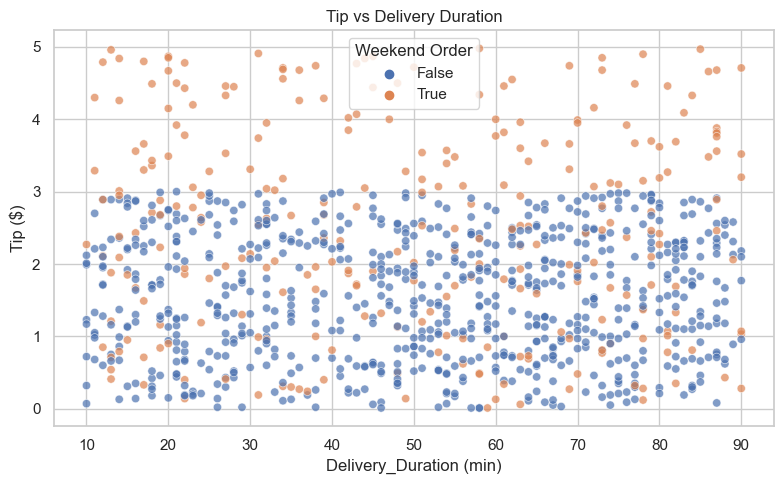

In [58]:
# Tip vs Delivery Dur

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Delivery_Duration (min)", y="Tip ($)", hue="Weekend Order", alpha=0.7)
plt.title("Tip vs Delivery Duration")
plt.tight_layout()
plt.show()

C:\Users\kimbe\AppData\Local\Temp\ipykernel_14784\1728913781.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Order_Hour", y="Tip ($)", marker="o", ci=None)


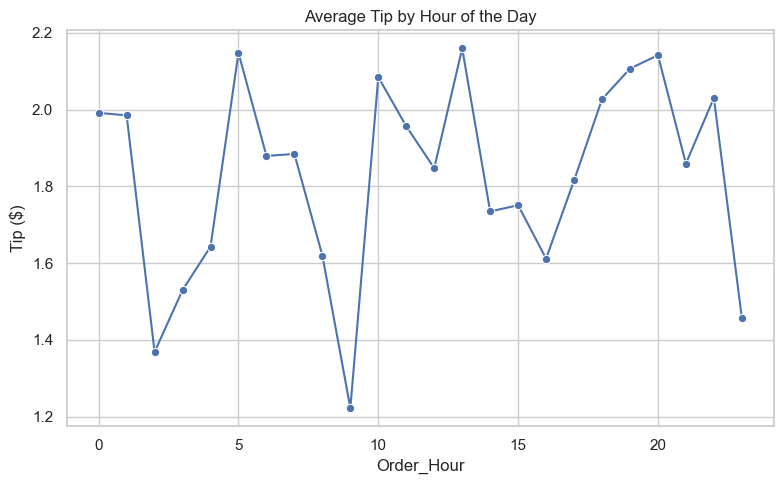

In [24]:
# Average Tip by Hour

plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x="Order_Hour", y="Tip ($)", marker="o", ci=None)
plt.title("Average Tip by Hour of the Day")
plt.tight_layout()
plt.show()

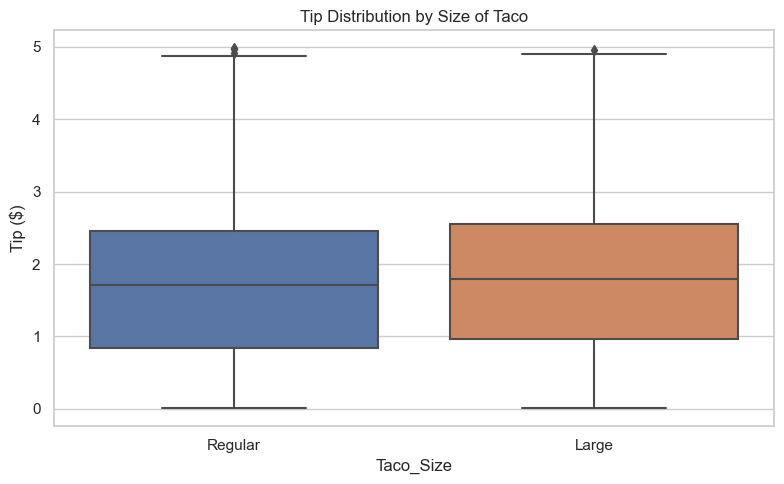

In [59]:
# Tip Distribution by Size

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Taco_Size", y="Tip ($)")
plt.title("Tip Distribution by Size of Taco")
plt.tight_layout()
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Drop nan
df_model = df.dropna(subset=["Tip ($)"])

features = [
    "Taco_Type", "Taco_Size", "Toppings_Count", 
    "Delivery_Duration (min)", "Distance (km)", 
    "Weekend Order", "Order_Hour"
]
target = "Tip ($)"
X = df_model[features]
y = df_model[target]

X = X.dropna()
y = y.loc[X.index]

# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
df.dropna()

,Order_ID,Restaurant_Name,Location,Order_Time,Delivery_Time,Delivery_Duration (min),Taco_Size,Taco_Type,Toppings_Count,Distance (km),Price,Tip ($),Weekend Order,Order_Hour,Order_DayOfWeek
0,770487,El Taco Loco,New York,2024-01-08 14:55:00,2024-01-08 15:36:00,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False,14.0,Monday
5,678856,Urban Tacos,San Antonio,2024-07-10 21:21:00,2024-07-10 22:44:00,83,Regular,Beef Taco,0,16.70,3.00,2.32,False,21.0,Wednesday
7,379946,El Taco Loco,San Antonio,2025-08-05 04:51:00,2025-08-05 05:22:00,31,Regular,Chicken Taco,3,9.80,6.75,2.97,False,4.0,Tuesday
8,771088,The Taco Stand,Houston,2024-08-09 21:04:00,2024-08-09 21:21:00,17,Regular,Beef Taco,2,10.33,5.50,0.33,True,21.0,Friday
12,590785,The Taco Stand,Phoenix,2025-05-03 16:52:00,2025-05-03 17:03:00,11,Regular,Pork Taco,2,19.33,5.50,1.02,False,16.0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,952092,Casa del Taco,New York,2025-07-05 06:27:00,2025-07-05 07:23:00,56,Regular,Veggie Taco,5,11.39,9.25,1.82,False,6.0,Saturday
989,805756,The Taco Stand,San Jose,2024-10-05 12:43:00,2024-10-05 13:50:00,67,Regular,Fish Taco,5,13.75,9.25,0.73,False,12.0,Saturday
990,278711,El Taco Loco,Los Angeles,2024-03-12 19:00:00,2024-03-12 19:13:00,13,Regular,Veggie Taco,3,19.27,6.75,0.66,False,19.0,Tuesday
996,232442,The Taco Stand,San Antonio,2025-03-04 20:51:00,2025-03-04 21:29:00,38,Regular,Fish Taco,0,13.69,3.00,1.38,False,20.0,Tuesday


In [41]:
#Code wasn't working, suspect weekend order is a bool and need change to int
print(X.dtypes)

Taco_Type                   object
Taco_Size                   object
Toppings_Count               int64
Delivery_Duration (min)      int64
Distance (km)              float64
Weekend Order                int32
Order_Hour                 float64
dtype: object


In [40]:
#change bool to int
X["Weekend Order"] = X["Weekend Order"].astype(int)

C:\Users\kimbe\AppData\Local\Temp\ipykernel_14784\1173105238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Weekend Order"] = X["Weekend Order"].astype(int)


In [45]:
# Category colum
cat_features = ["Taco_Type", "Taco_Size"]

# Apply preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ],
    remainder="passthrough"  # Leave numeric features as-is
)

# RF pipeline
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Taco_Type',
                                                   'Taco_Size'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [46]:
# Predict w/ test data
y_pred = model_pipeline.predict(X_test)

# Results, lower mae the better, r2 close to one the better fit, rmse lower is better
# this RF model isnt a terrible fit but probably not the best, maybe try LR next time
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): $0.87
Root Mean Squared Error (RMSE): $1.02
R² Score: 0.19


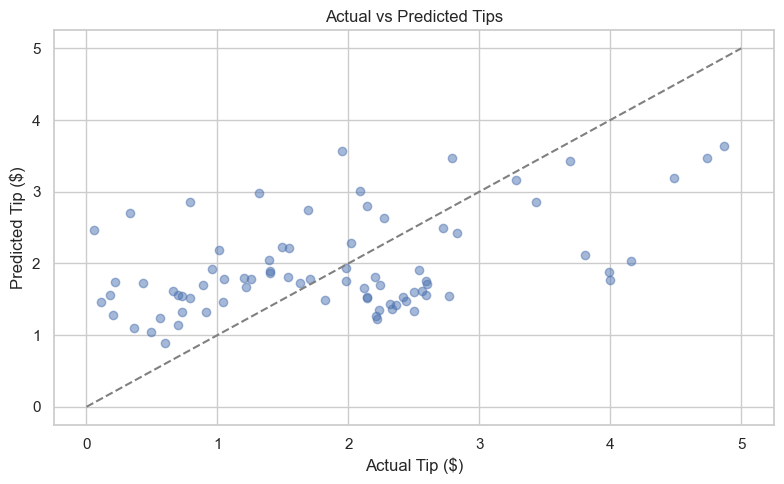

In [47]:
# want a diagram of actual vs predicted tips to have a visual of how well the model did.
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Tip ($)")
plt.ylabel("Predicted Tip ($)")
plt.title("Actual vs Predicted Tips")
plt.plot([0, 5], [0, 5], '--', color='gray')
plt.tight_layout()
plt.show()

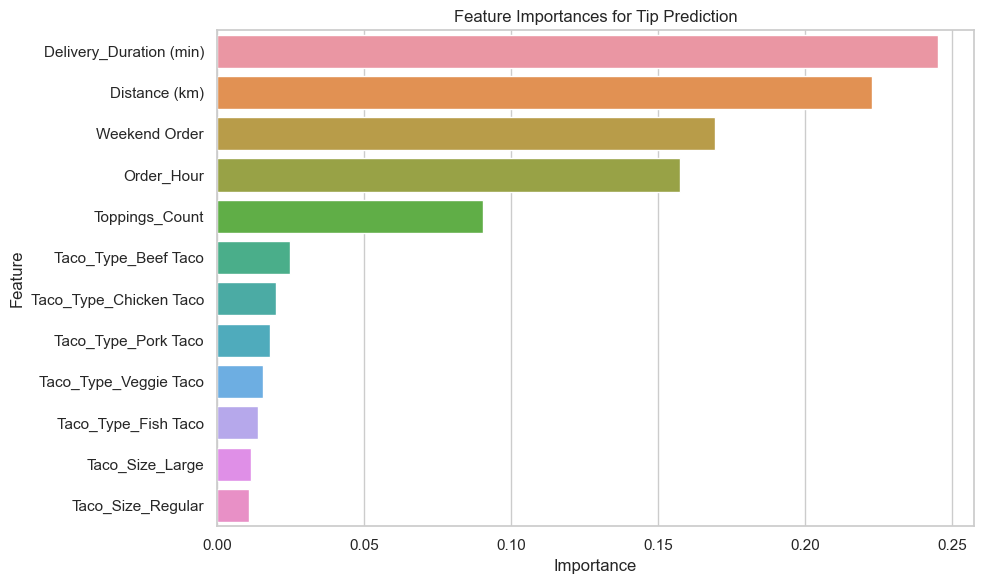

In [70]:
# Features Importance
import numpy as np

# use the one hot encoder from the pipeline
ohe = model_pipeline.named_steps["preprocessor"].named_transformers_["cat"]
ohe_feature_names = ohe.get_feature_names_out(["Taco_Type", "Taco_Size"])

# put all the feature names together
numeric_features = ["Toppings_Count", "Delivery_Duration (min)", "Distance (km)", "Weekend Order", "Order_Hour"]
all_features = list(ohe_feature_names) + numeric_features

# get the feature importances
importances = model_pipeline.named_steps["regressor"].feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# create a visual for feature importances.  Delivery duration has the biggest impact. 
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x="Importance", y="Feature")
plt.title("Feature Importances for Tip Prediction")
plt.tight_layout()
plt.show()

In [50]:
# Price optimization model, create the features
price_features = [
    "Taco_Type", "Taco_Size", "Toppings_Count",
    "Delivery_Duration (min)", "Distance (km)"
]
target_price = "Price"

# set X and y
X_price = df[price_features].copy()
y_price = df[target_price]

# adjust data tupes
X_price["Taco_Type"] = X_price["Taco_Type"].astype(str)
X_price["Taco_Size"] = X_price["Taco_Size"].astype(str)

# get rid of missing values
X_price = X_price.dropna()
y_price = y_price.loc[X_price.index]

In [52]:
# Train-test split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_price, y_price, test_size=0.2, random_state=42)

# Preprocessor
preprocessor_price = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), ["Taco_Type", "Taco_Size"])
    ],
    remainder="passthrough"
)

#Price Optimization with linear regression
from sklearn.linear_model import LinearRegression

# linear regression pipeline
linear_pipeline = Pipeline([
    ("preprocessor", preprocessor_price),  # Reuses the one-hot encoder from earlier
    ("regressor", LinearRegression())
])

# Train 
linear_pipeline.fit(X_train_p, y_train_p)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Taco_Type',
                                                   'Taco_Size'])])),
                ('regressor', LinearRegression())])

In [53]:
# Results, r2 values closer to one are a better fit, lower mae means better fit, i think this is a well fit model
y_pred_lin = linear_pipeline.predict(X_test_p)

mae_lin = mean_absolute_error(y_test_p, y_pred_lin)
r2_lin = r2_score(y_test_p, y_pred_lin)

print(f"Linear Regression MAE: ${mae_lin:.2f}")
print(f"R² Score: {r2_lin:.2f}")

Linear Regression MAE: $0.00
R² Score: 1.00


In [60]:
# Features importance, pos coef= inc taco pred price, neg coef= dec pred price, bigger abs val stronger influ
ohe_lin = linear_pipeline.named_steps["preprocessor"].named_transformers_["cat"]
ohe_features = ohe_lin.get_feature_names_out(["Taco_Type", "Taco_Size"])

# all features
final_features = list(ohe_features) + ["Toppings_Count", "Delivery_Duration (min)", "Distance (km)"]

# feature effects
coefs = linear_pipeline.named_steps["regressor"].coef_

# create df
coef_df = pd.DataFrame({
    "Feature": final_features,
    "Coefficient": coefs
}).sort_values(by="Coefficient", key=abs, ascending=False)

coef_df

,Feature,Coefficient
7,Toppings_Count,1.250000e+00
5,Taco_Size_Large,7.500000e-01
6,Taco_Size_Regular,-7.500000e-01
1,Taco_Type_Chicken Taco,1.450004e-15
3,Taco_Type_Pork Taco,-1.405941e-15
4,Taco_Type_Veggie Taco,-8.115865e-16
2,Taco_Type_Fish Taco,4.741537e-16
0,Taco_Type_Beef Taco,2.046321e-16
9,Distance (km),5.868922e-17
8,Delivery_Duration (min),3.095046e-17


In [67]:
# LR to predict price
df["Predict_Price_LR"] = linear_pipeline.predict(X_price)

# Calculate the difference
df["Price_Diff_LR"] = df["Price"] - df["Predict_Price_LR"]

In [68]:
# use this to see if prices are over, under, or priced fair compared to original predicted price.
df["Pricing_Flag_LR"] = df["Price_Diff_LR"].apply(
    lambda x: "Underpriced" if x < -1.0 else ("Overpriced" if x > 1.0 else "Fairly Priced")
)

In [69]:
#Results
df[[
    "Taco_Type", "Taco_Size", "Toppings_Count", 
    "Price", "Predict_Price_LR", "Price_Diff_LR", "Pricing_Flag_LR"
]].head(10)

,Taco_Type,Taco_Size,Toppings_Count,Price,Predict_Price_LR,Price_Diff_LR,Pricing_Flag_LR
0,Chicken Taco,Regular,5,9.25,9.25,3.552714e-15,Fairly Priced
1,Beef Taco,Regular,1,4.25,4.25,0.000000e+00,Fairly Priced
2,Pork Taco,Large,2,7.00,7.00,8.881784e-16,Fairly Priced
3,Chicken Taco,Regular,2,5.50,5.50,-8.881784e-16,Fairly Priced
4,Pork Taco,Large,0,4.50,4.50,-8.881784e-16,Fairly Priced
5,Beef Taco,Regular,0,3.00,3.00,-3.552714e-15,Fairly Priced
6,Veggie Taco,Large,1,5.75,5.75,0.000000e+00,Fairly Priced
7,Chicken Taco,Regular,3,6.75,6.75,0.000000e+00,Fairly Priced
8,Beef Taco,Regular,2,5.50,5.50,8.881784e-16,Fairly Priced
9,Fish Taco,Large,1,5.75,5.75,-1.776357e-15,Fairly Priced


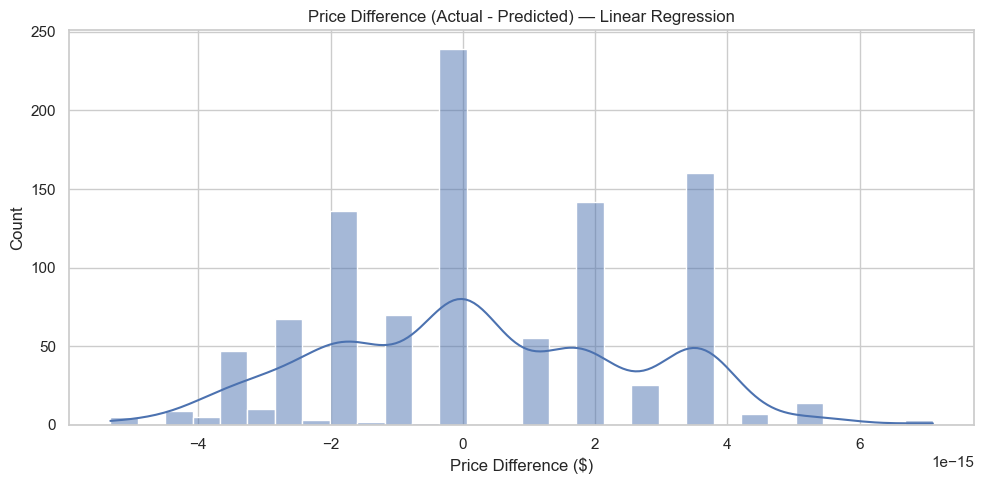

In [66]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Price_Diff_LR"], bins=30, kde=True)
plt.title("Price Difference (Actual - Predicted) — Linear Regression")
plt.xlabel("Price Difference ($)")
plt.tight_layout()
plt.show()
#looks like there is not much of a difference between actual and predicted and most tacos are priced pretty fairly. 